In [4]:

import pandas as pd
df = pd.read_csv ("web2.csv")
df.head()

,Pageviews,Sessions,Purchase
0,100,200,Yes
1,130,133,No
2,500,250,Yes


In [6]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df['Purchase']=number.fit_transform(df['Purchase'].astype('str'))
df.head()


,Pageviews,Sessions,Purchase
0,100,200,1
1,130,133,0
2,500,250,1


In [7]:
Y=df['Purchase']
X=df[['Pageviews','Sessions']]

In [12]:
import sklearn as sk
# Let's now build a classifier and evaluate accuracy
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)
print("train sample size",x_train.shape,type(x_train))
print("test sample size",x_test.shape,type(x_test))


from sklearn.linear_model import LogisticRegression
MyModel= LogisticRegression().fit(X,Y)
X_new=[[150,50]]
Y_Pred =MyModel.predict(X_new)
Y_Pred


train sample size (2, 2) <class 'pandas.core.frame.DataFrame'>
test sample size (1, 2) <class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

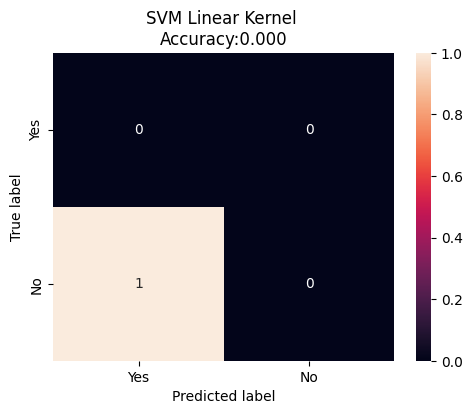

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

clf = SVC(kernel = 'linear').fit(x_train,y_train)
clf.predict(x_train)
y_pred = clf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Yes','No'],
                     columns = ['Yes','No'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [17]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.00
